## 動區動趨

In [1]:
import json
import bs4
import os
import urllib.request as req

import requests
response = requests.get("https://www.blocktempo.com")
#對網頁發出請求
soup = bs4.BeautifulSoup(response.text, "html.parser")
#prettify()>>將soup這個物件美化
print(soup.prettify())

<!DOCTYPE html>
<!--[if lt IE 7]> <html class="no-js lt-ie9 lt-ie8 lt-ie7" dir="ltr" lang="zh-TW" prefix="og: http://ogp.me/ns# fb: http://ogp.me/ns/fb#"> <![endif]-->
<!--[if IE 7]>    <html class="no-js lt-ie9 lt-ie8" dir="ltr" lang="zh-TW" prefix="og: http://ogp.me/ns# fb: http://ogp.me/ns/fb#"> <![endif]-->
<!--[if IE 8]>    <html class="no-js lt-ie9" dir="ltr" lang="zh-TW" prefix="og: http://ogp.me/ns# fb: http://ogp.me/ns/fb#"> <![endif]-->
<!--[if IE 9]>    <html class="no-js lt-ie10" dir="ltr" lang="zh-TW" prefix="og: http://ogp.me/ns# fb: http://ogp.me/ns/fb#"> <![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js" dir="ltr" lang="zh-TW" prefix="og: http://ogp.me/ns# fb: http://ogp.me/ns/fb#">
 <!--<![endif]-->
 <head>
  <style>
   img.lazy{min-height:1px}
  </style>
  <link as="script" href="https://www.blocktempo.com/wp-content/plugins/w3-total-cache/pub/js/lazyload.min.js" rel="preload"/>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta conten

In [2]:
# #儲存url
# url_list1 = []
# response = requests.get("https://www.blocktempo.com/category/cryptocurrency-market/")
# #對網頁發出請求
# soup = bs4.BeautifulSoup(response.text, "html.parser")
# urls = soup.find_all("div", class_="jeg_thumb")
# # print(f"====================第1頁====================")
# for url in urls:
# #title_temp 暫時儲存資料的地方
#     url_temp = url.select_one("a").get("href")
# #幫他放入list
#     url_list1.append(url_temp)


# for page in range(1, 4):  # 執行1~3頁
#     response = requests.get("https://www.blocktempo.com/category/cryptocurrency-market/"+"page/"+str(page)+"/")
# #對網頁發出請求
#     soup = bs4.BeautifulSoup(response.text, "html.parser")

# #先幫他見一個list
    
# #尋找要的地址位置、以及幫他放入list
#     urls = soup.find_all("div", class_="jeg_thumb")
#     print(f"====================第{str(page)}頁====================")
#     for url in urls:
#     #title_temp 暫時儲存資料的地方
#         url_temp = url.select_one("a").get("href")
#     #幫他放入list
#         url_list1.append(url_temp)
# # print(url_list1)

In [3]:
# import pandas as pd 
# df = pd.DataFrame(url_list1)
# df.tail()

In [4]:
#儲存文章標題
title_list1 = []

response = requests.get("https://www.blocktempo.com")
#對網頁發出請求
soup = bs4.BeautifulSoup(response.text, "html.parser")
#先幫他見一個list
    
#尋找要的地址位置、以及幫他放入list
titles = soup.find_all("h3", class_="jeg_post_title")
for title in titles:
    #title_temp 暫時儲存資料的地方
    title_temp = title.a.text
    #######給我把那個可惡的/刪掉！！！！
    string = ''
    for char in title_temp:
        if 47 != ord(char):#用ASCII找 https://www.ascii-code.com/
            string += char 
    #幫他放入list
    title_list1.append(string)
# print(title_list)
# print(f"====================第1頁====================")


for page in range(1, 31):  # 執行1~3頁
    response = requests.get("https://www.blocktempo.com/category/cryptocurrency-market/"+ "page/"+str(page)+"/")
#對網頁發出請求
    soup = bs4.BeautifulSoup(response.text, "html.parser")
#先幫他見一個list
    
#尋找要的地址位置、以及幫他放入list
    titles = soup.find_all("h3", class_="jeg_post_title")
    for title in titles:
    #title_temp 暫時儲存資料的地方
        title_temp = title.a.text
        
        #######給我把那個可惡的/刪掉！！！！
        string = ''
        for char in title_temp:
            if 47 != ord(char):#用ASCII找 https://www.ascii-code.com/
                string += char 
        #幫他放入list
        title_list1.append(string)
#     print(title_list1)
    print(f"====================第{str(page)}頁====================")

====================第1頁====================
====================第2頁====================
====================第3頁====================
====================第4頁====================
====================第5頁====================
====================第6頁====================
====================第7頁====================
====================第8頁====================
====================第9頁====================
====================第10頁====================
====================第11頁====================
====================第12頁====================
====================第13頁====================
====================第14頁====================
====================第15頁====================
====================第16頁====================
====================第17頁====================
====================第18頁====================
====================第19頁====================
====================第20頁====================
====================第21頁====================
====================第22頁====================
===================

In [5]:
import pandas as pd 
df = pd.DataFrame(title_list1, columns=['title'])
df.tail()

,title
516,麻吉大哥宣布「退出 NFT 」！BAYC地板價創今年新低
517,蘋果推「4.15%」高利息活存！Apple Card合作高盛、iPhone就能開戶
518,SEC主席難囂張！出席聽證會不敢說「以太坊是證券」
519,英特爾放棄比特幣挖礦大餅！Intel Blockscale ASIC晶片10月前停產
520,富爸爸押注比特幣「年漲100%」還沒完！轟美國聯準會、拜登都是騙子


## 科技新報

In [6]:
def scroll(scrolltimes):
  for i in range(scrolltimes):
    # 每一次頁面滾動都是滑到網站最下方
    js = 'window.scrollTo(0, document.body.scrollHeight);'
    options.execute_script(js)
    time.sleep(2)

In [7]:
import json
import bs4
import os
import urllib.request as req

import requests
response = requests.get("https://technews.tw/")
#對網頁發出請求
soup = bs4.BeautifulSoup(response.text, "html.parser")
#prettify()>>將soup這個物件美化
print(soup.prettify())

scroll(10)

<!DOCTYPE html>
<!--[if IE 7]>
<html class="ie ie7" lang="zh-TW">
<![endif]-->
<!--[if IE 8]>
<html class="ie ie8" lang="zh-TW">
<![endif]-->
<!--[if !(IE 7) | !(IE 8)  ]><!-->
<html lang="zh-TW">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <title>
   TechNews 科技新報 | 市場和業內人士關心的趨勢、內幕與新聞
  </title>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <meta content="5DEC29CE8988D72A1C6791568D17E9F3" name="msvalidate.01">
   <meta content="Fb8JUo8FsCKBCR6sNHNW83sKPV3W1YRAbpmeWVK0OqA" name="google-site-verification"/>
   <meta content="10.0.0.26" name="tf"/>
   <meta content="TechNews 科技新報 | 市場和業內人士關心的趨勢、內幕與新聞" name="Title"/>
   <meta content="科技新報 （TechNews）成立於 2013 年下半年，是專注於資訊科技、能源、半導體、行動運算、網際網路、醫療、生物科技等涵蓋各種產業與新科技的網路媒體，希望能給予對資訊科技有需求的讀者一個廣泛且有觀點與特色的文章為目標。" name="Description"/>
   <meta content="https://img.technews.tw/wp-content/themes/twentytwelve/library/images/logo.gif" name="thumbnail"/>
   <!-- OG Meta -->
   <meta content="zh_TW" property="og:locale"/>
 

NameError: name 'options' is not defined

In [8]:
# 抓標題連結

# #先幫他見一個list
# title_list2 = []
# #尋找要的地址位置、以及幫他放入list
# titles = soup.find_all("h1", class_="entry-title")
# for title in titles:
#     #title_temp 暫時儲存資料的地方
#     title_temp = title.select_one("a").get("href")
#     #幫他放入list
#     title_list2.append(title_temp)
# print(title_list2)
# #alltitle = soup.find_all("h1",class_="entry-title") 
# # 尋找所有在 div 標籤內 class="zIH PC4 XiG" 
# #print(alltitle)

In [9]:
import json
import bs4
import os
import urllib.request as req
import requests
title_list2 = []

response = requests.get("https://technews.tw/page/"+ str(page)+"/")
#對網頁發出請求
soup = bs4.BeautifulSoup(response.text, "html.parser")
#先幫他見一個list
    
#尋找要的地址位置、以及幫他放入list
titles = soup.find_all("h1", class_="entry-title")
for title in titles:
    #title_temp 暫時儲存資料的地方
    title_temp = title.a.text
    #######給我把那個可惡的/刪掉！！！！
    string = ''
    for char in title_temp:
        if 47 != ord(char):#用ASCII找 https://www.ascii-code.com/
            string += char 
    #幫他放入list
    title_list2.append(string)
# print(title_list)
# print(f"====================第1頁====================")


for page in range(1, 31):  # 執行1~3頁
    response = requests.get("https://technews.tw/page/"+ str(page)+"/")
#對網頁發出請求
    soup = bs4.BeautifulSoup(response.text, "html.parser")
#先幫他見一個list
    
#尋找要的地址位置、以及幫他放入list
    titles = soup.find_all("h1", class_="entry-title")
    for title in titles:
    #title_temp 暫時儲存資料的地方
        title_temp = title.a.text
        
        #######給我把那個可惡的/刪掉！！！！
        string = ''
        for char in title_temp:
            if 47 != ord(char):#用ASCII找 https://www.ascii-code.com/
                string += char 
        #幫他放入list
        title_list2.append(string)
#     print(title_list2)
    print(f"====================第{str(page)}頁====================")

====================第1頁====================
====================第2頁====================
====================第3頁====================
====================第4頁====================
====================第5頁====================
====================第6頁====================
====================第7頁====================
====================第8頁====================
====================第9頁====================
====================第10頁====================
====================第11頁====================
====================第12頁====================
====================第13頁====================
====================第14頁====================
====================第15頁====================
====================第16頁====================
====================第17頁====================
====================第18頁====================
====================第19頁====================
====================第20頁====================
====================第21頁====================
====================第22頁====================
===================

In [10]:
import pandas as pd 
df = pd.DataFrame(title_list2, columns=['title'])
df

,title
0,聯電 3 月營收月增 4.88%，第一季營收季減逾 20%
1,遠亞併，遠傳總座：公平會通過 Q4 就可完成整併
2,手機就能投保車火險！富邦產險首創行動身分識別「E 指保」服務
3,Galaxy Z Tab 要來了？三星摺疊平板今年有望亮相
4,聚焦電動車電能補充！工研院盼制定雙向充電及雲端充電管理整合
...,...
460,"2022 年電競監視器出貨量衰退至 1,980 萬台，2023 年可望恢復成長"
461,取代傳統戶外看板，E Ink Kaleido 3 Outdoor 彩色印刷電子紙登場
462,中國拿美光開刀，分析：非不可取代且對中不友好
463,急單挹注，台積電供應商家登 3 月與第一季營收同創歷史新高


In [11]:
# 合併新聞標題
title_list1.extend(title_list2)
result = title_list1
# print(result)

In [12]:
orgdata = pd.DataFrame(result, columns=['title'])

In [13]:
orgdata.tail()

,title
981,"2022 年電競監視器出貨量衰退至 1,980 萬台，2023 年可望恢復成長"
982,取代傳統戶外看板，E Ink Kaleido 3 Outdoor 彩色印刷電子紙登場
983,中國拿美光開刀，分析：非不可取代且對中不友好
984,急單挹注，台積電供應商家登 3 月與第一季營收同創歷史新高
985,日政府敲定，額外補貼 Rapidus 2 奈米廠 3 千億日圓


In [14]:
import jieba
import jieba.analyse
import re
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter

plt.rcParams["font.sans-serif"]='Microsoft JhengHei'

In [15]:
orgdata = pd.DataFrame(df)

In [16]:
orgdata['seg'] = ""
orgdata.head()

,title,seg
0,聯電 3 月營收月增 4.88%，第一季營收季減逾 20%,
1,遠亞併，遠傳總座：公平會通過 Q4 就可完成整併,
2,手機就能投保車火險！富邦產險首創行動身分識別「E 指保」服務,
3,Galaxy Z Tab 要來了？三星摺疊平板今年有望亮相,
4,聚焦電動車電能補充！工研院盼制定雙向充電及雲端充電管理整合,


In [17]:
# 定義科技相關詞彙
tech_words = ['人工智慧','機器學習','區塊鏈','物聯網','雲端運算','大數據','虛擬實境','FTX',
              '加密貨幣','比特幣','AI','3D列印','GPT-4','ChatGPT','Copilot','AI 繪圖','半導體',
              'Fed','OpenAPI','GPT','穩定幣','DeFi','BitMEX','SVB','USDC','FDIC','Meta','Web3',
              'NFT','Silvergate','Coinbase','ETH','元宇宙','Metaverse','Clubhouse','Decentralizing',
              'AIGC','Bard','Bing','以太坊','擴增實境','虛擬實境','網路安全' ,'智能合約','AR','VR','3D',
              '電子支付','網路安全','資訊安全' ,'能源儲存','基因體定序','UIUX']
# ,'','','','','','','',''

In [18]:
# 篩選科技相關詞彙並斷詞
tokens = []
for n in result:
    words = jieba.cut(n)
    for w in words:
        if w in tech_words:
            tokens.append(w)
#             re.match('.*[\u4e00-\u9fa5]+.*', w) and 

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\happy\AppData\Local\Temp\jieba.cache
Loading model cost 0.877 seconds.
Prefix dict has been built successfully.


In [19]:
print(tokens)

['NFT', 'ChatGPT', 'Meta', 'NFT', 'FTX', 'FTX', 'ETH', 'Web3', 'DeFi', 'BitMEX', 'NFT', 'DeFi', 'NFT', 'Web3', 'DeFi', 'Web3', 'ETH', 'ETH', 'ETH', 'NFT', 'ETH', 'Web3', 'DeFi', 'ETH', 'ETH', 'GPT', 'NFT', 'DeFi', 'NFT', 'ETH', 'ETH', 'GPT', 'ETH', 'FTX', 'FTX', 'ETH', 'GPT', 'Web3', 'FTX', 'FTX', 'NFT', 'Web3', 'Web3', 'ETH', 'AI', 'ChatGPT', 'FTX', 'NFT', 'FTX', 'FTX', 'NFT', 'FTX', 'NFT', 'Web3', 'ETH', 'AI', 'ChatGPT', 'FTX', 'FTX', 'NFT', 'FTX', 'NFT', 'FTX', 'NFT', 'FTX', 'NFT', 'Web3', 'FTX', 'ETH', 'ETH', 'ETH', 'FTX', 'NFT', 'Web3', 'NFT', 'ETH', 'ETH', 'FTX', 'NFT', 'Web3', 'NFT', 'ETH', 'ETH', 'FTX', 'NFT', 'FTX', 'FTX', 'FTX', 'NFT', 'Metaverse', 'ETH', 'NFT', 'NFT', 'USDC', 'AI', 'FTX', 'NFT', 'FTX', 'NFT', 'FTX', 'NFT', 'FTX', 'NFT', 'AI', 'Web3', 'USDC', 'FTX', 'Web3', 'NFT', 'FDIC', 'ETH', 'NFT', 'Coinbase', 'FTX', 'NFT', 'Fed', 'ETH', 'NFT', 'Fed', 'NFT', 'SVB', 'Coinbase', 'FTX', 'NFT', 'Fed', 'NFT', 'NFT', 'USDC', 'NFT', 'FTX', 'Fed', 'ETH', 'Coinbase', 'Meta', 'NFT'

In [20]:
len(tokens)

262

In [21]:
import pandas as pd
from collections import Counter

# 創建一個 Python 的 list
# my_list = ["apple", "banana", "apple", "orange", "banana", "grape"]

# 使用 Counter 函數計算詞頻
word_count = Counter(tokens)

# 將字典轉換成 DataFrame
df = pd.DataFrame.from_dict(word_count, orient="index", columns=["frequency"])

# 檢查結果
df


,frequency
NFT,47
ChatGPT,20
Meta,2
FTX,37
ETH,29
Web3,14
DeFi,7
BitMEX,1
GPT,3
AI,38


文字雲

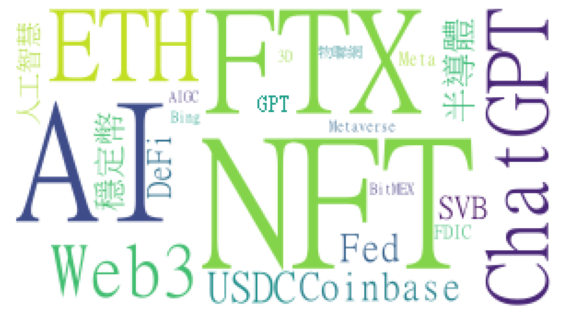

In [22]:
from PIL import Image # PIL：影像處理套件
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np

mask = np.array(Image.open("black_rectangle.png")) # 想呈現的圖案形狀
font = "C:\Windows\Fonts\mingliu.ttc" # 選取想呈現字體的字體路徑

# 把文字變成圖片(文字雲)
wordcloud = WordCloud(background_color = "white", font_path=font, mask = mask)
wordcloud.generate_from_frequencies(word_count)

# 調圖片的大小顯示圖片
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [23]:
import pandas as pd 
df = pd.DataFrame(tokens, columns=['word'])
df.head()

,word
0,NFT
1,ChatGPT
2,Meta
3,NFT
4,FTX


In [24]:
# 備份
orgdata.to_csv("crawler_0325_1.csv", index=False)
df.to_csv("crawler_df_0325_1.csv", index=False)

### 把科技詞彙列表存成json檔的list屬性

In [25]:
import json

# my_list = ['apple', 'banana', 'orange']

# 將 list 轉成 JSON 格式
tokens_json = json.dumps(tokens)

# 將 JSON 格式的資料寫入檔案
with open('tokens.json', 'w') as f:
    f.write('{"list": ' + tokens_json + '}')


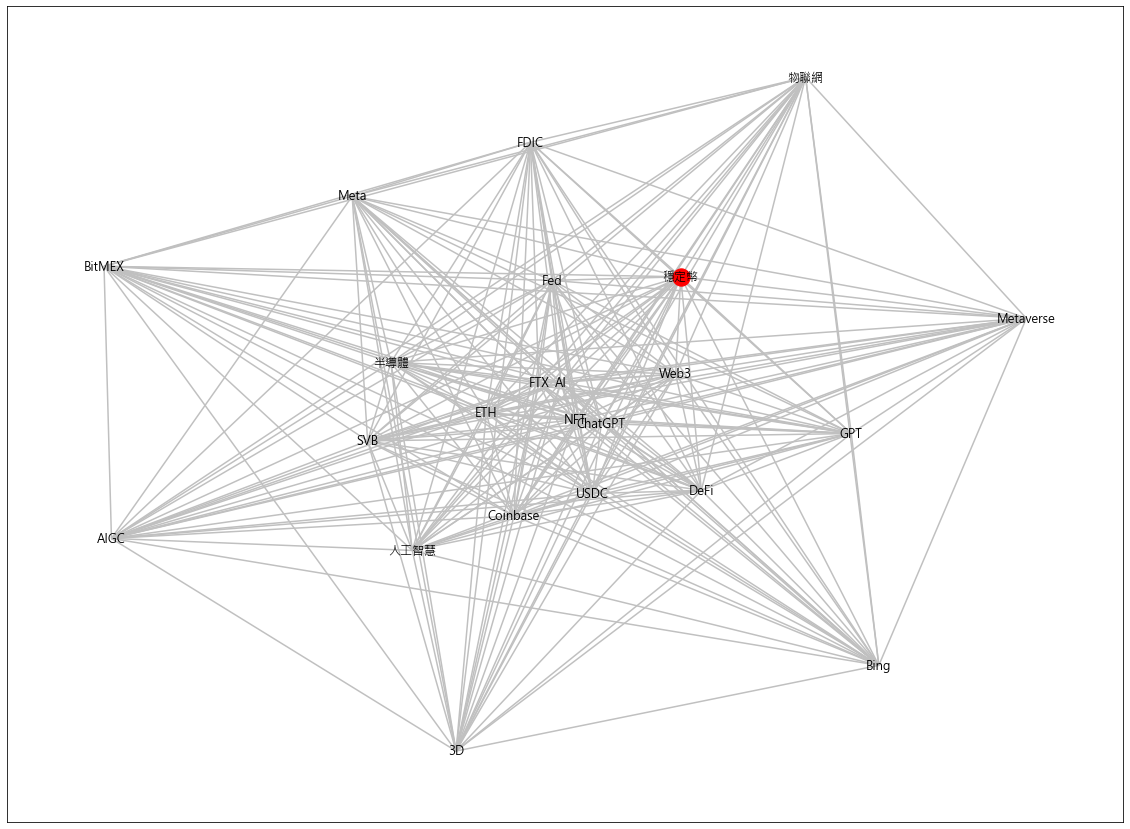

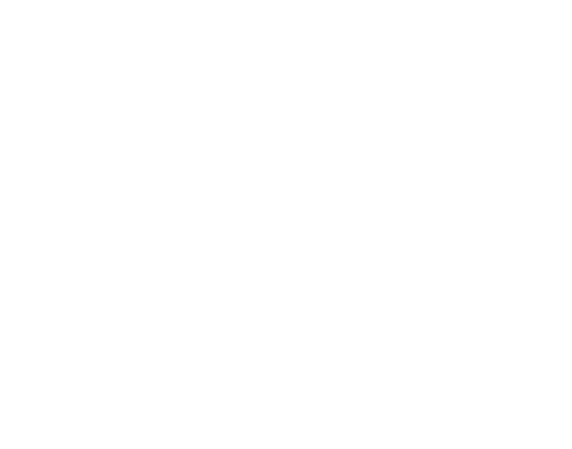

In [26]:
import networkx as nx
import matplotlib.pyplot as plt
import collections

# 創建一個空的無向圖
G = nx.Graph()

# 計算詞語列表中每個詞出現的次數
count = collections.Counter(tokens)

# 加入節點
for word, freq in count.items():
    G.add_node(word, size=freq)

# 計算共現頻率並加入邊
for i in range(len(tokens)-1):
    for j in range(i+1, len(tokens)):
        if tokens[i] != tokens[j]:
            if G.has_edge(tokens[i], tokens[j]):
                G[tokens[i]][tokens[j]]['weight'] += 1
            else:
                G.add_edge(tokens[i], tokens[j], weight=1)

# 刪除共線性為零的節點
for node in list(G.nodes):
    if G.degree(node) == 0:
        G.remove_node(node)

# 指定中心節點
center_node = '穩定幣'

# 計算每個節點到中心節點的距離
distances = nx.shortest_path_length(G, target=center_node)

# 定義節點的顏色和大小
node_color = [distances[v] for v in G]
node_size = [G.nodes[v]['size']*50 for v in G]

# 定義邊的顏色和粗細
edge_color = '#C0C0C0'
edge_width = 1.5

# 設置圖片尺寸
plt.figure(figsize=(20, 15))

# 繪製圖形
pos = nx.spring_layout(G, k=0.25, iterations=20)
nx.draw_networkx_nodes(G, pos, nodelist=[center_node], node_size=300, node_color='r')
# nx.draw_networkx_nodes(G, pos, nodelist=list(set(G.nodes)-set([center_node])), node_size=node_size, node_color=node_color, cmap=plt.cm.Purples)
nx.draw_networkx_edges(G, pos, edge_color=edge_color, width=edge_width)
nx.draw_networkx_labels(G, pos, font_size=12, font_family='Microsoft JhengHei', font_color='black')

plt.figure(figsize=(10, 8))
plt.axis('off')
plt.show()

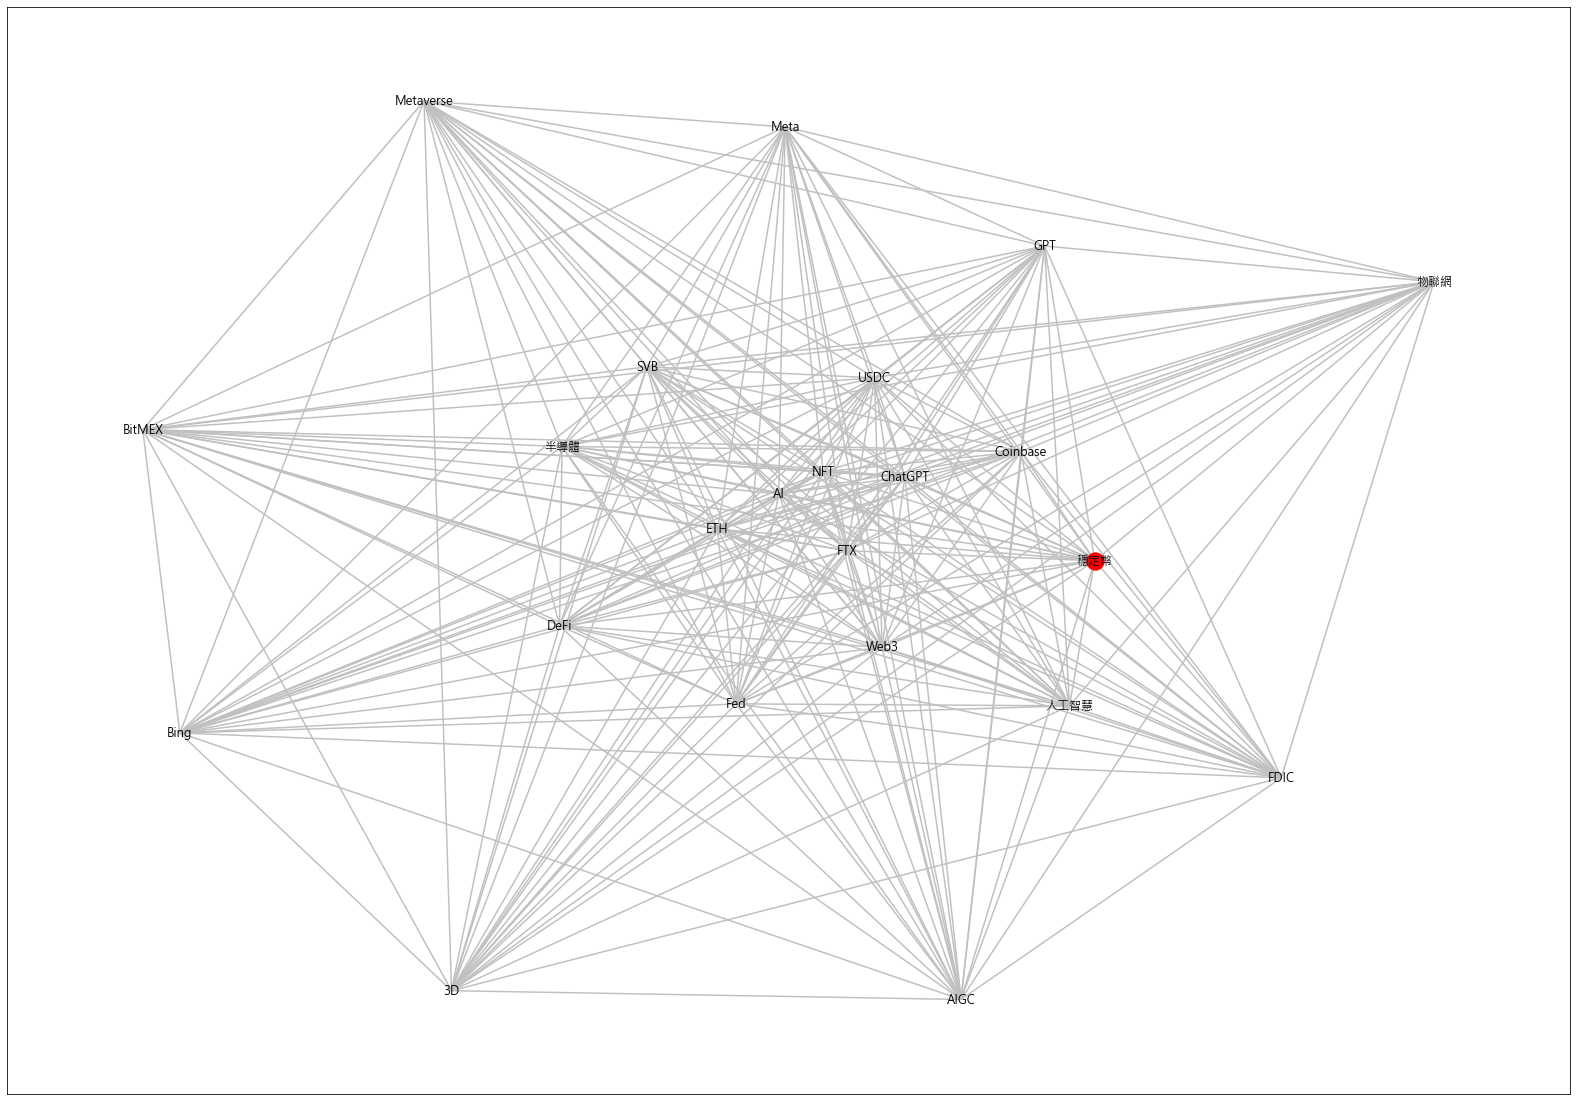

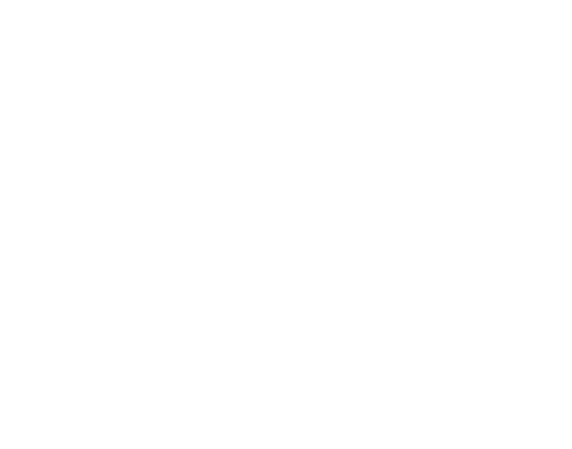

In [30]:
import networkx as nx
import matplotlib.pyplot as plt
import collections

# 創建一個空的無向圖
G = nx.Graph()

# 計算詞語列表中每個詞出現的次數
count = collections.Counter(tokens)

# 加入節點
for word, freq in count.items():
    G.add_node(word, size=freq)

# 計算共現頻率並加入邊
for i in range(len(tokens)-1):
    for j in range(i+1, len(tokens)):
        if tokens[i] != tokens[j]:
            if G.has_edge(tokens[i], tokens[j]):
                G[tokens[i]][tokens[j]]['weight'] += 1
            else:
                G.add_edge(tokens[i], tokens[j], weight=1)

# 刪除共線性為零的節點
for node in list(G.nodes):
    if G.degree(node) == 0:
        G.remove_node(node)

# 指定中心節點
center_node = '穩定幣'

# 計算每個節點到中心節點的距離
distances = nx.shortest_path_length(G, target=center_node)

# 只保留與中心節點相連的節點，且距離為1
# surrounding_nodes = [node for node, distance in distances.items() if distance == 1 and G.has_edge(center_node, node)]

# 只保留與中心節點相連的節點，且距離為1
surrounding_nodes = []
for node in G.neighbors(center_node):
    if G.degree(node) == 1:
        surrounding_nodes.append(node)

# 設置圖片尺寸
plt.figure(figsize=(28, 20))

# 繪製圖形
pos = nx.spring_layout(G, k=0.25, iterations=20)
nx.draw_networkx_nodes(G, pos, nodelist=[center_node], node_size=300, node_color='r')
nx.draw_networkx_nodes(G, pos, nodelist=surrounding_nodes, node_size=357, node_color=node_color, cmap=plt.cm.Purples)
nx.draw_networkx_edges(G, pos, edge_color=edge_color, width=edge_width)
nx.draw_networkx_labels(G, pos, font_size=12, font_family='Microsoft JhengHei', font_color='black')

plt.figure(figsize=(10, 8))
plt.axis('off')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


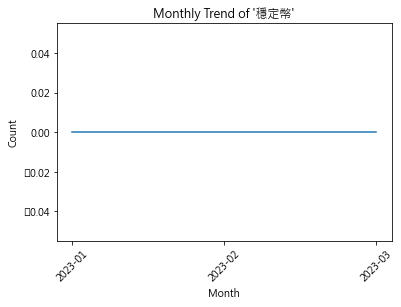

In [28]:
import requests
from bs4 import BeautifulSoup
import datetime
import matplotlib.pyplot as plt

# 定義目標詞彙
target_word = "穩定幣"

# 設置爬蟲起始和終止日期
start_date = datetime.date(2023, 1, 1)
end_date = datetime.date(2023, 3, 29)

# 初始化月份和次數的字典
monthly_counts = {}

# 進行網路爬蟲
while start_date <= end_date:
    # 格式化日期
    date_str = start_date.strftime("%Y/%m/%d")
    
    # 構建目標網址
    url = f"https://www.blocktempo.com/"
    
    # 發送GET請求
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")
    
    # 搜尋目標詞彙並統計次數
    count = 0
    for p in soup.find_all("p"):
        count += p.text.count(target_word)
    
    # 將次數加入到對應的月份中
    monthly_counts[start_date.strftime("%Y-%m")] = count
    
    # 前進到下個月份
    if start_date.month == 12:
        start_date = datetime.date(start_date.year + 1, 1, 1)
    else:
        start_date = datetime.date(start_date.year, start_date.month + 1, 1)

# 生成趨勢圖
months = list(monthly_counts.keys())
counts = list(monthly_counts.values())

plt.plot(months, counts)
plt.xlabel("Month")
plt.ylabel("Count")
plt.title(f"Monthly Trend of '{target_word}'")
plt.xticks(rotation=45)
plt.show()